In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

data = pd.read_csv("vgsales.csv")
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Model R² score: 0.9146073822392753


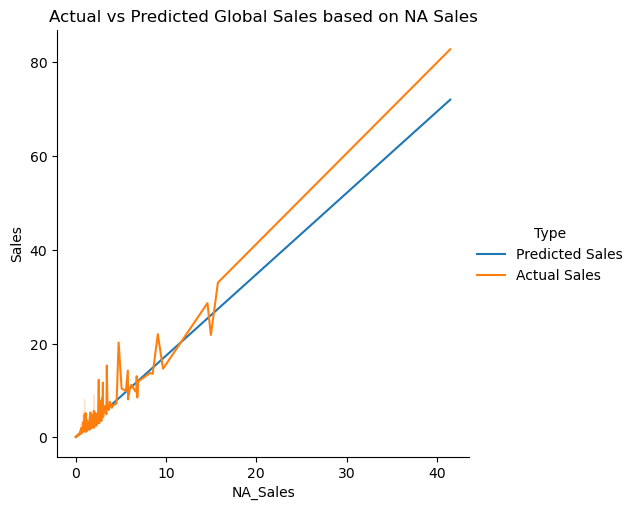

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("vgsales.csv")

x = data[["NA_Sales"]]     
y = data["Global_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

score = linear_model.score(x_test, y_test)  
print("Model R² score:", score)

y_predict = linear_model.predict(x_test)
predict_df = pd.DataFrame({
    "Predicted Sales": y_predict,
    "Actual Sales": y_test.values,
    "NA_Sales": x_test["NA_Sales"].values
})

long_df = pd.melt(
    predict_df,
    id_vars="NA_Sales",
    value_vars=["Predicted Sales", "Actual Sales"],
    var_name="Type",
    value_name="Sales"
)

sns.relplot(data=long_df, x="NA_Sales", y="Sales", hue="Type", kind="line")
plt.title("Actual vs Predicted Global Sales based on NA Sales")
plt.show()

